In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE

In [4]:
# accessing to the folder where the file is stored
path = 'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (31647, 18)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = dataframe.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns      # we will store the numeric features in a variable
print("===="*20)
print("Numeric Features:")
print(numeric_data.head())
print("===="*20)


Numeric Features:
      ID  age  balance  day  duration  campaign  pdays  previous
0  26110   56     1933   19        44         2     -1         0
1  40576   31        3   20        91         2     -1         0
2  15320   27      891   18       240         1     -1         0
3  43962   57     3287   22       867         1     84         3
4  29842   31      119    4       380         1     -1         0


In [6]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = dataframe.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns      # we will store the categorical features in a variable

print("===="*20)
print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
          job   marital  education default housing loan    contact month  \
0      admin.   married    unknown      no      no   no  telephone   nov   
1     unknown   married  secondary      no      no   no   cellular   jul   
2    services   married  secondary      no     yes   no   cellular   jul   
3  management  divorced   tertiary      no      no   no   cellular   jun   
4  technician   married  secondary      no     yes   no   cellular   feb   

  poutcome subscribed  
0  unknown         no  
1  unknown         no  
2  unknown         no  
3  success        yes  
4  unknown         no  


In [7]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(dataframe.dtypes)

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object


In [8]:
# CHECK THE NON-NULL COUNT OF ALL COLUMNS:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB
None


In [13]:
import pandas as pd

# create a DataFrame
df = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})

# check if 'y' is in the columns
if 'y' in df.columns:
    # compute the percentage of each class in the 'y' column
    class_values = (df['y'].value_counts() / df['y'].value_counts().sum()) * 100
    print(class_values)
else:
    # handle the case where 'y' is not in the columns
    print("'y' column not found in DataFrame")


4    33.333333
5    33.333333
6    33.333333
Name: y, dtype: float64


In [14]:
import pandas as pd

# create a DataFrame
df = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})

try:
    # compute the percentage of each class in the 'y' column
    class_values = (df['y'].value_counts() / df['y'].value_counts().sum()) * 100
    print(class_values)
except KeyError:
    # handle the case where 'y' is not in the columns
    print("'y' column not found in DataFrame")


4    33.333333
5    33.333333
6    33.333333
Name: y, dtype: float64


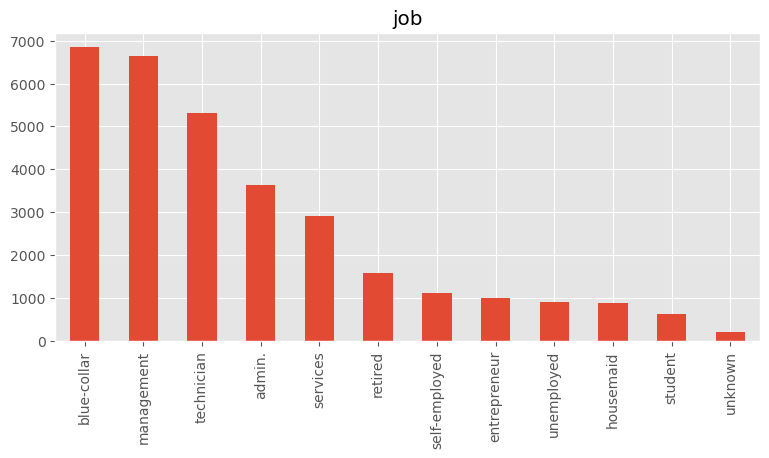

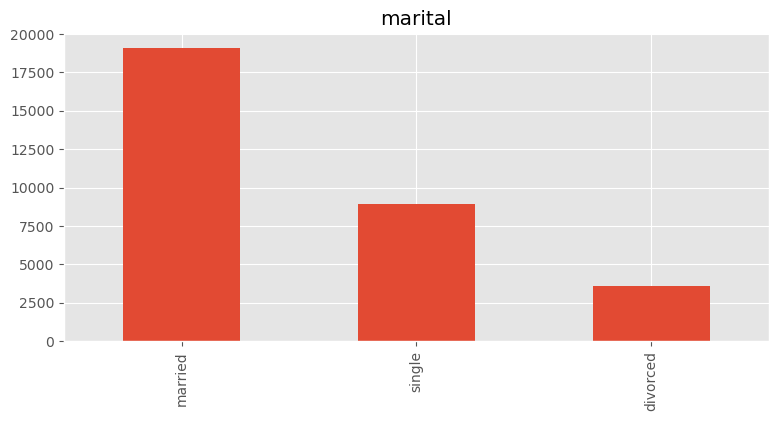

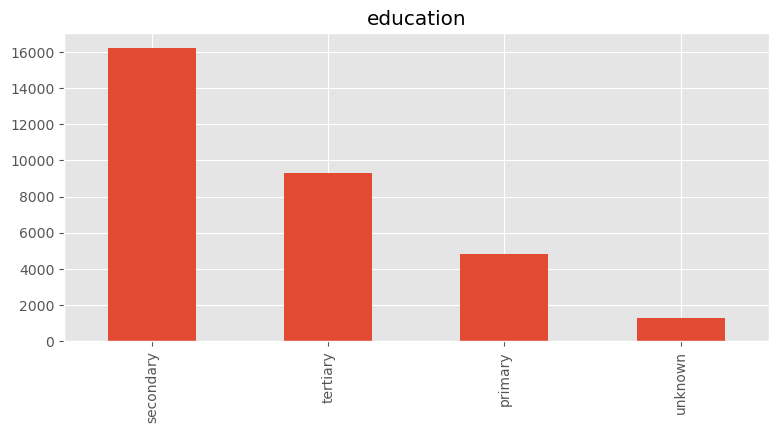

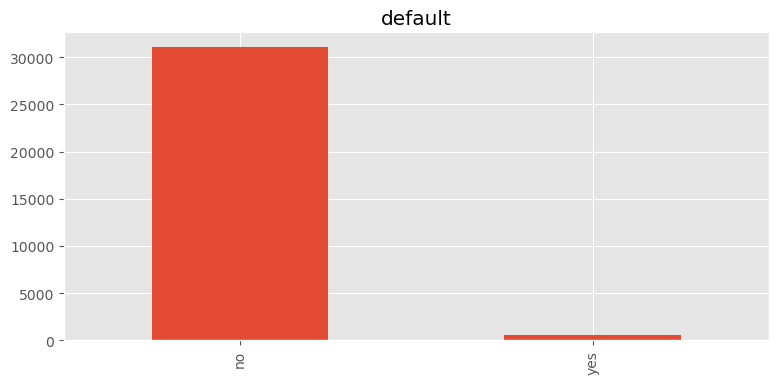

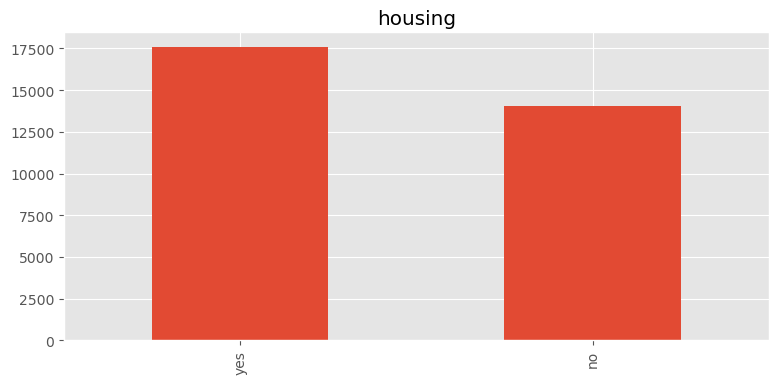

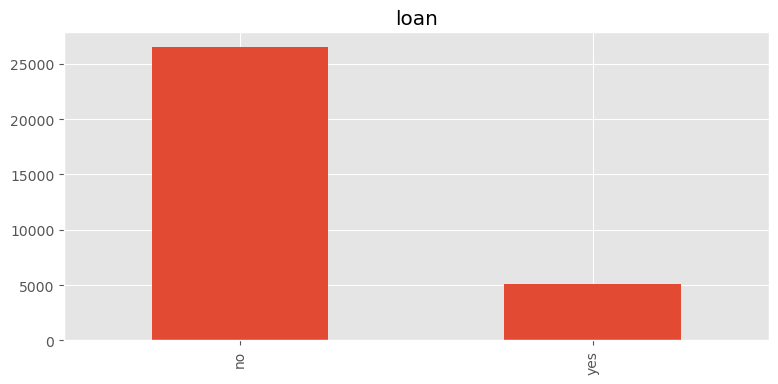

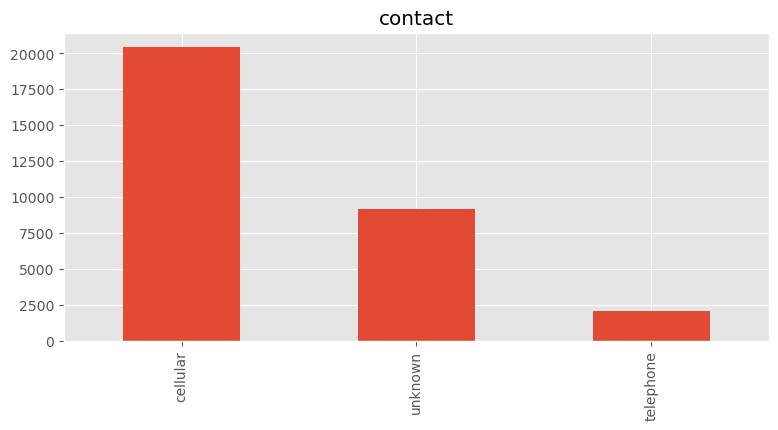

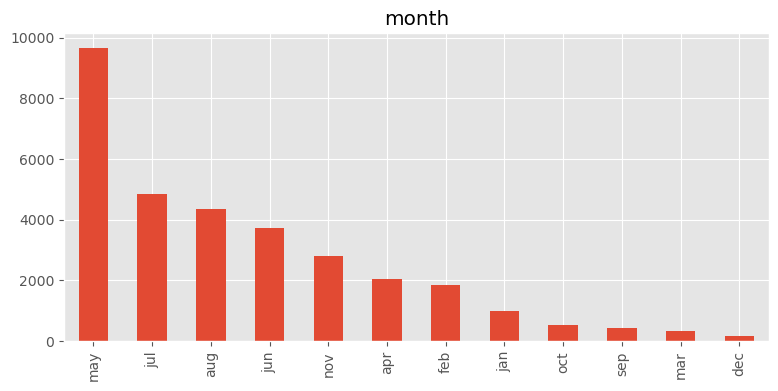

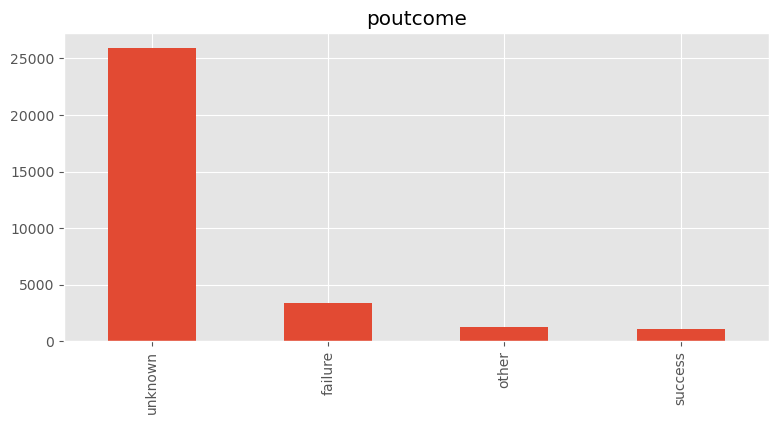

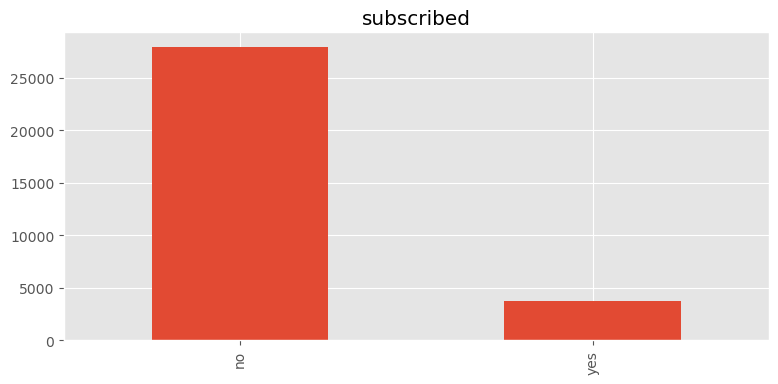

In [15]:
# Selecting the categorical columns
categorical_col = dataframe.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)

In [16]:
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace('unknown',mode)

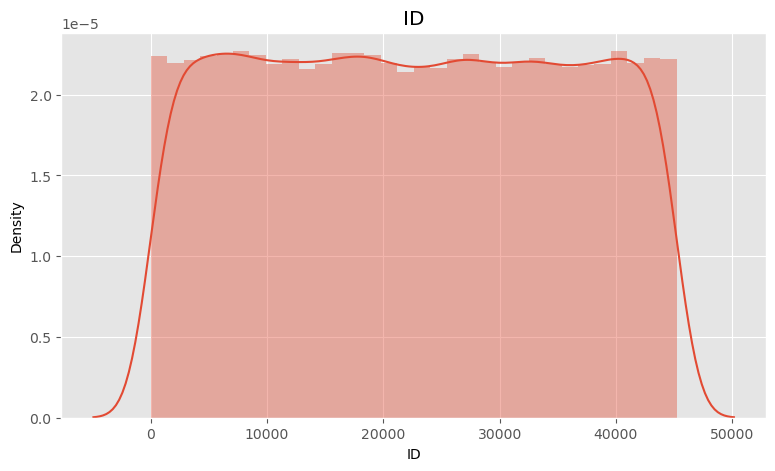

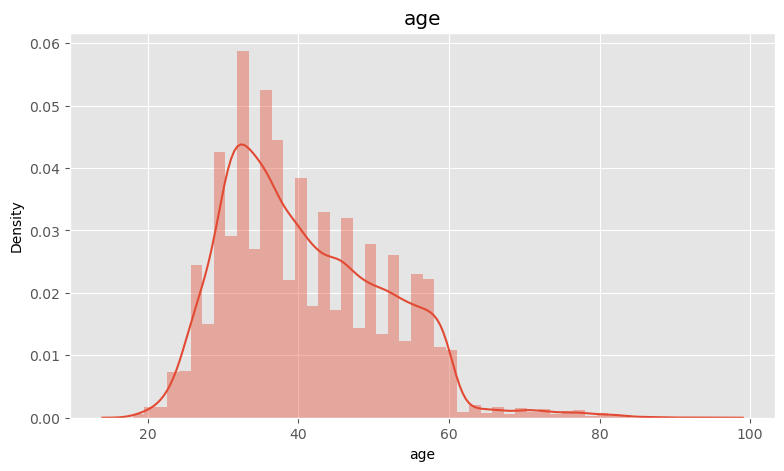

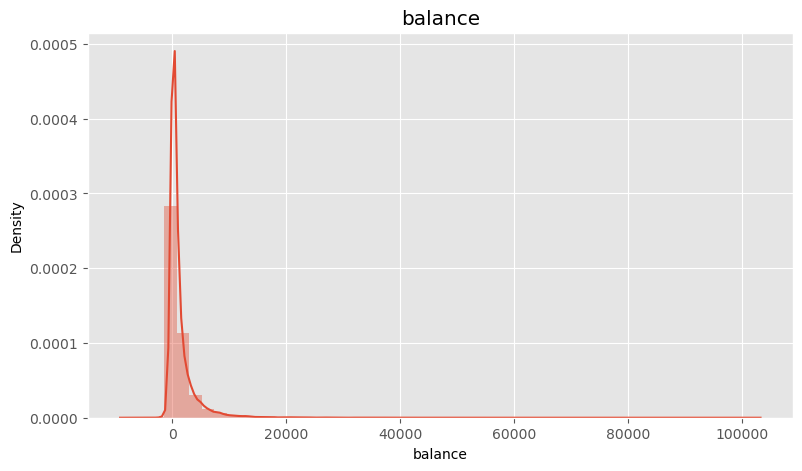

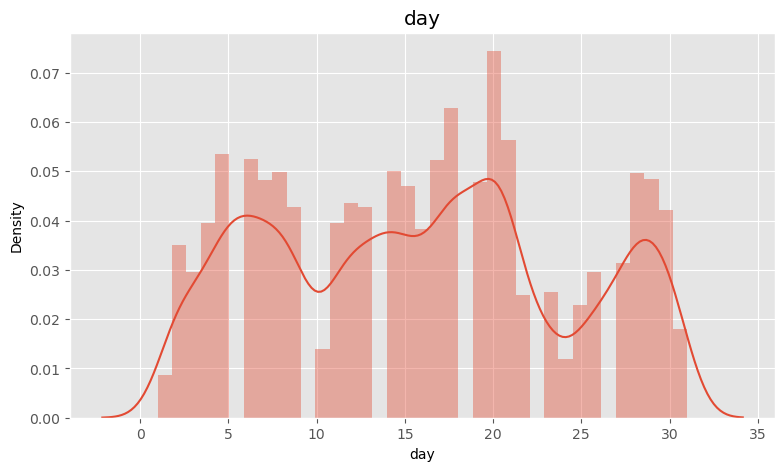

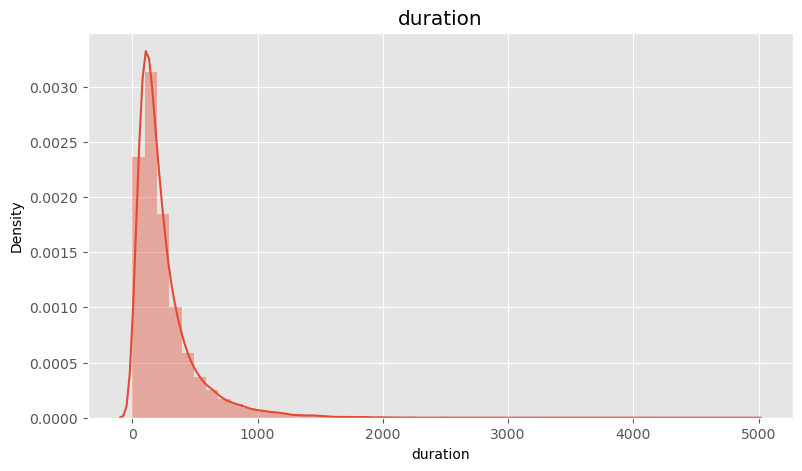

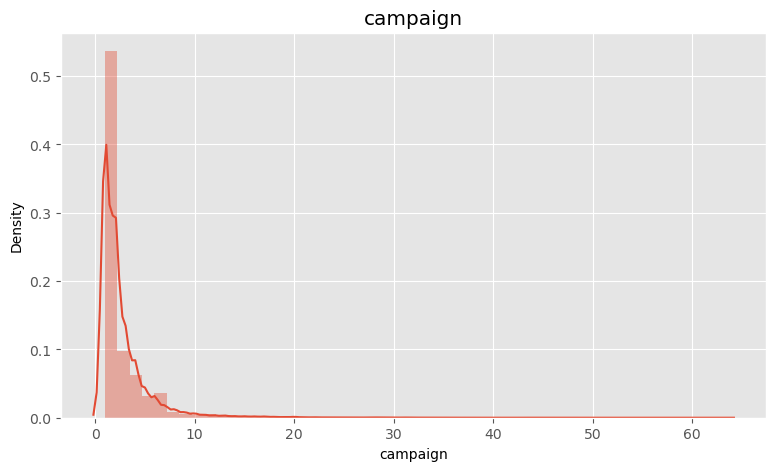

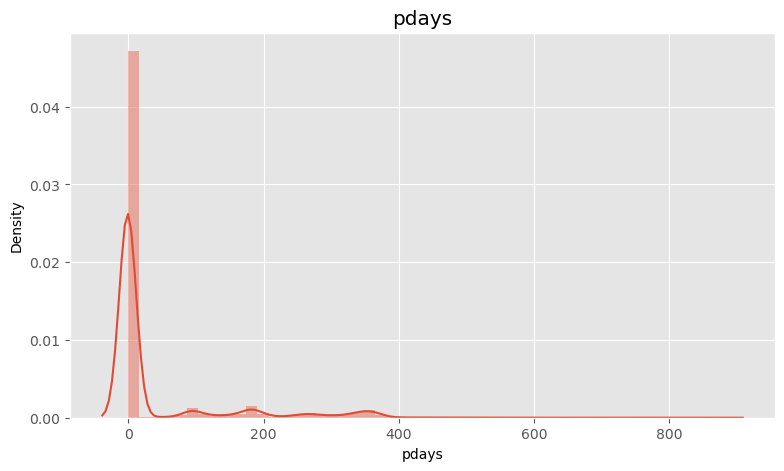

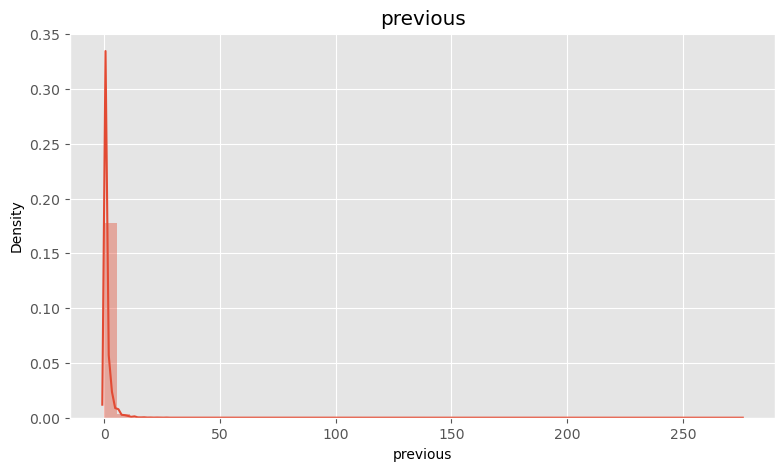

In [17]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(dataframe[column])
    plt.title(column)

KeyError: 'y'

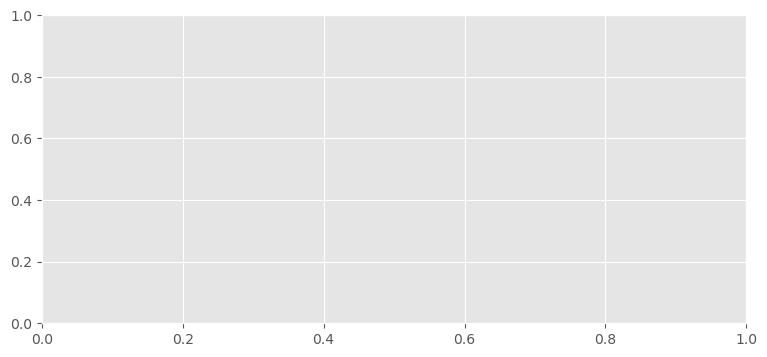

In [18]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)    
    plt.xticks(rotation=90)

In [32]:
# Initializing lable encoder
le = LabelEncoder()

# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)


In [33]:
# Initializing label encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)


In [ ]:
dataframe.to_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv',index=False)


In [47]:
pip install pandas-profiling[notebook]


  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached ipywidgets-8.0.6-py3-none-any.whl (138 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp310-cp310-win_amd64.whl (663 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ANACONDA SOFT\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [48]:
# Import the necessary libraries
import pandas as pd
from pandas_profiling import ProfileReport

# Load the dataset
dataframe = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

# Create the profile report
prof = ProfileReport(dataframe)
prof


ModuleNotFoundError: No module named 'pandas_profiling'